<a href="https://colab.research.google.com/github/TomisinT99/boston-housing-analysis/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 1

In [ ]:
#Reading of csv file
import pandas as pd
import numpy as np
#Loading and indexing the dataset
boston= pd.read_csv('BostonHousing.csv')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
#pyspark installation
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=c30009de4379869ceae9b0c1fc8a124237a61c1c8ce32348b248294e61a8c7b1
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean
#Initialize Spark Session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()
#Loading the data
data = spark.read.csv("BostonHousing.csv", sep=",", header = True, inferSchema=True)


In [ ]:
#Showing first 5 element
data.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
#numbers of observation in the dataset
data.count()


506

In [15]:
#dataset schema
data.printSchema()


root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)
 |-- Age10: double (nullable = true)



In [ ]:
#removing the column 'b' from the dataset
data = data.drop("b")


In [ ]:
#rounding all numeric column to 2 decimal place
from pyspark.sql.functions import col, round

# List of numeric columns
numeric_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

# Round each numeric column to two decimal places
for col_name in numeric_columns:
    data = data.withColumn(col_name, round(col(col_name), 2))


In [ ]:
#creating a new column with 10% increase of age
data = data.withColumn("Age10", data["age"] * 1.1)


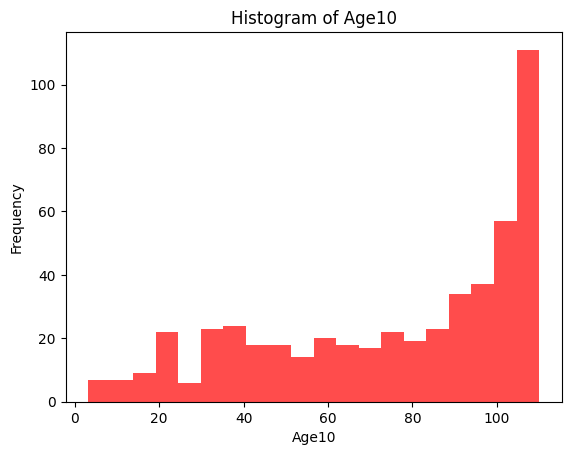

In [17]:
#Histogram plot of new column 'AGE10'
import matplotlib.pyplot as plt

age10_values = data.select("Age10").rdd.flatMap(lambda x: x).collect()
plt.hist(age10_values, bins=20, color='red', alpha=0.7)
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.title('Histogram of Age10')
plt.show()


In [ ]:
#summary stat of all columns
data.describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [ ]:
#converting sparkdataframe to Pandasdataframe
import pandas as pd

data_pandas = data.toPandas()


In [ ]:
#Last 5 rows of Pandasdataframe
data_pandas.tail()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,7.88,11.9,88.88
